#컨볼루션 신경망

컨볼루션 신경망 예제 1) 컨볼루션 신경망 구축

Epoch 1/30
329/329 [==============================] - 37s 108ms/step - loss: 0.7221 - acc: 0.7335 - val_loss: 0.4354 - val_acc: 0.8476
Epoch 2/30
329/329 [==============================] - 37s 112ms/step - loss: 0.4408 - acc: 0.8394 - val_loss: 0.3606 - val_acc: 0.8719
Epoch 3/30
329/329 [==============================] - 35s 105ms/step - loss: 0.3838 - acc: 0.8611 - val_loss: 0.3313 - val_acc: 0.8824
Epoch 4/30
329/329 [==============================] - 34s 104ms/step - loss: 0.3531 - acc: 0.8711 - val_loss: 0.3214 - val_acc: 0.8831
Epoch 5/30
329/329 [==============================] - 34s 103ms/step - loss: 0.3312 - acc: 0.8798 - val_loss: 0.3105 - val_acc: 0.8893
Epoch 6/30
329/329 [==============================] - 35s 105ms/step - loss: 0.3139 - acc: 0.8845 - val_loss: 0.2779 - val_acc: 0.9024
Epoch 7/30
329/329 [==============================] - 32s 99ms/step - loss: 0.3018 - acc: 0.8901 - val_loss: 0.2684 - val_acc: 0.9033
Epoch 8/30
329/329 [==============================] - 34

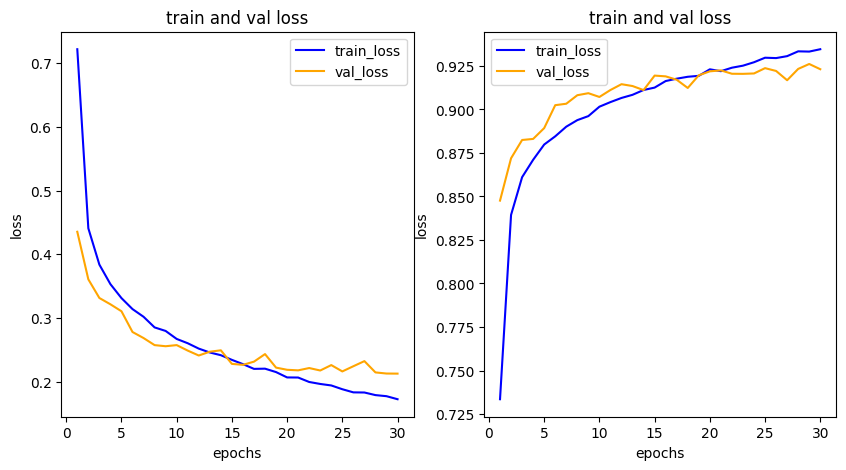


313/313 [==============================] - 4s 12ms/step - loss: 0.2297 - acc: 0.9184

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          18496     
                                 

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
              "Sneaker", "Bag", "Ankle boot"]

# 0~1 범위로 만들기, 처리속도 빨라짐
x_train = np.reshape(x_train/255, (-1, 28, 28, 1))
x_test = np.reshape(x_test/255, (-1, 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3,
                                                  random_state = 777)

model = Sequential([
    Conv2D(filters = 16, kernel_size = 3, padding = "same", activation = "relu",
          input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = "same"),

    Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = "same"),

    Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = "same"),

    Dropout(0.5),
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["acc"])
history = model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

his_dict = history.history

loss = his_dict["loss"]
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = "blue", label = "train_loss")
ax1.plot(epochs, val_loss, color = "orange", label = "val_loss")
ax1.set_title("train and val loss")
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.legend()

acc = his_dict["acc"]
val_acc = his_dict["val_acc"]

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = "blue", label = "train_loss")
ax2.plot(epochs, val_acc, color = "orange", label = "val_loss")
ax2.set_title("train and val loss")
ax2.set_xlabel("epochs")
ax2.set_ylabel("loss")
ax2.legend()

plt.show()
print()

## 모델 평가
model.evaluate(x_test, y_test)
print()

model.summary()

컨볼루션 신경망(CNN) ) 내가 수치 조정해보기

Epoch 1/40
329/329 [==============================] - 4s 8ms/step - loss: 0.8347 - acc: 0.6794 - val_loss: 0.4840 - val_acc: 0.8159
Epoch 2/40
329/329 [==============================] - 2s 6ms/step - loss: 0.4985 - acc: 0.8164 - val_loss: 0.3973 - val_acc: 0.8578
Epoch 3/40
329/329 [==============================] - 3s 9ms/step - loss: 0.4256 - acc: 0.8435 - val_loss: 0.3374 - val_acc: 0.8754
Epoch 4/40
329/329 [==============================] - 3s 8ms/step - loss: 0.3867 - acc: 0.8542 - val_loss: 0.3313 - val_acc: 0.8805
Epoch 5/40
329/329 [==============================] - 3s 8ms/step - loss: 0.3580 - acc: 0.8680 - val_loss: 0.3123 - val_acc: 0.8841
Epoch 6/40
329/329 [==============================] - 2s 7ms/step - loss: 0.3389 - acc: 0.8747 - val_loss: 0.2890 - val_acc: 0.8954
Epoch 7/40
329/329 [==============================] - 2s 6ms/step - loss: 0.3218 - acc: 0.8801 - val_loss: 0.2946 - val_acc: 0.8946
Epoch 8/40
329/329 [==============================] - 3s 8ms/step - loss: 0.

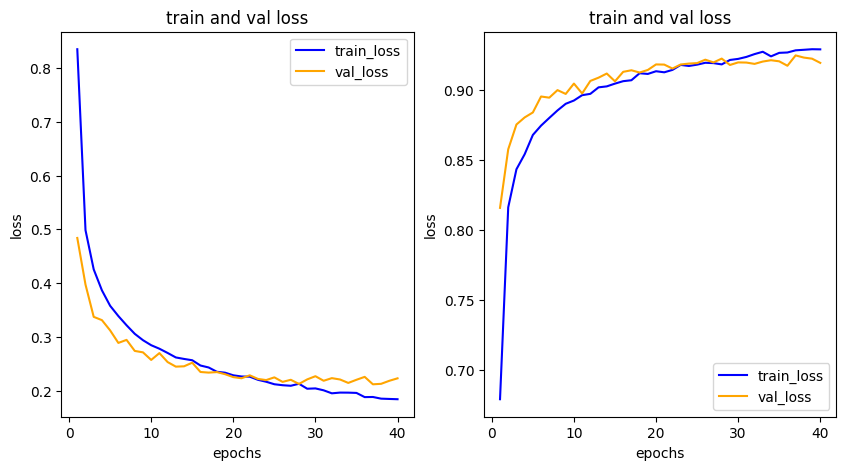


313/313 [==============================] - 1s 3ms/step - loss: 0.2500 - acc: 0.9084

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                  

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
from keras.initializers import RandomNormal # 커널 값을 랜덤 정규화 값으로 설정하기 위한 임포트

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
              "Sneaker", "Bag", "Ankle boot"]

# 0~1 범위로 만들기, 처리속도 빨라짐
x_train = np.reshape(x_train/255, (-1, 28, 28, 1))
x_test = np.reshape(x_test/255, (-1, 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3,
                                                  random_state = 777)


# 모델 정의
model = Sequential([
  Conv2D(filters=16, kernel_size=3, padding="same", activation="relu",
          input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=(2, 2), strides=2, padding="same"),
  Dropout(0.2),

  Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
  MaxPool2D(pool_size=(2, 2), strides=2, padding="same"),
  Dropout(0.2),

  Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
  MaxPool2D(pool_size=(2, 2), strides=2, padding="same"),
  Dropout(0.2),

  Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
  MaxPool2D(pool_size=(2, 2), strides=2, padding="same"),
  Dropout(0.2),

  Flatten(),
  Dense(128, activation="relu"),
  Dense(64, activation="relu"),
  Dense(10, activation="softmax")
])

# 모델 컴파일
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

# 모델 훈련
history = model.fit(x_train, y_train, epochs=40, batch_size=128, validation_data=(x_val, y_val))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# 모델 요약
his_dict = history.history

loss = his_dict["loss"]
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = "blue", label = "train_loss")
ax1.plot(epochs, val_loss, color = "orange", label = "val_loss")
ax1.set_title("train and val loss")
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.legend()

acc = his_dict["acc"]
val_acc = his_dict["val_acc"]

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = "blue", label = "train_loss")
ax2.plot(epochs, val_acc, color = "orange", label = "val_loss")
ax2.set_title("train and val loss")
ax2.set_xlabel("epochs")
ax2.set_ylabel("loss")
ax2.legend()

plt.show()
print()

## 모델 평가
model.evaluate(x_test, y_test)
print()

model.summary()

CIFAR-10 데이터셋 예제) CIFAR-10 데이터셋으로 CNN 적용해보기

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


<ipython-input-18-d1238d2abcb0>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


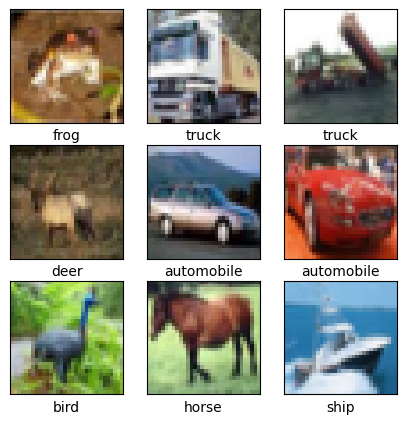

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000
Epoch 1/30
1094/1094 [==============================] - 11s 8ms/step - loss: 1.8795 - acc: 0.3015 - val_loss: 1.5506 - val_acc: 0.4279
Epoch 2/30
1094/1094 [==============================] - 8s 8ms/step - loss: 1.5065 - acc: 0.4475 - val_loss: 1.3696 - val_acc: 0.5015
Epoch 3/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.3635 - acc: 0.5063 - val_loss: 1.2454 - val_acc: 0.5514
Epoch 4/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.2578 - acc: 0.5476 - val_loss: 1.1395 - val_acc: 0.5888
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.1788 - acc: 0.5814 - val_loss: 1.0746 - val_acc: 0.6135
Epoch 6/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.1141 - acc: 0.6003 - val_loss: 1.0489 - val_acc: 0.6212
Epoch 7/30
1094/1094 [==============================] - 8s 8ms/step - loss: 1.0519 - acc: 0.6241 - val_loss: 0.9895 - val_acc: 0.6445
Epoch 8/30


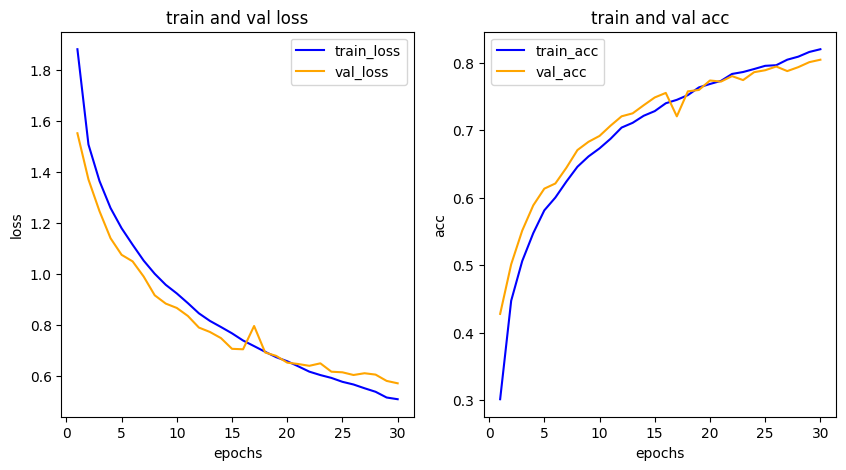

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.initializers import RandomNormal # 커널 값을 랜덤 정규화 값으로 설정하기 위한 임포트

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

class_names = ['ariplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse',
               'ship', 'truck']
sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize = (5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[int(y_train[i])])
plt.show()

## 전처리 과정
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test =  (x_test - x_mean) / x_std

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

## 모델 구성
model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',
#                  input_shape=(32, 32, 3), kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',
                 input_shape=(32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


CIFAR-10 데이터셋 예제 2) CIFAR-10 데이터셋 CNN 모델 신경망 시각화해보기 (코드는 중요하지 않아. 확인만 해보기)

1/1 [==============================] - 0s 119ms/step


<ipython-input-19-0cb0a382ba72>:21: RuntimeWarning: invalid value encountered in divide
  x -= x.mean(); x /= x.std()
<ipython-input-19-0cb0a382ba72>:23: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


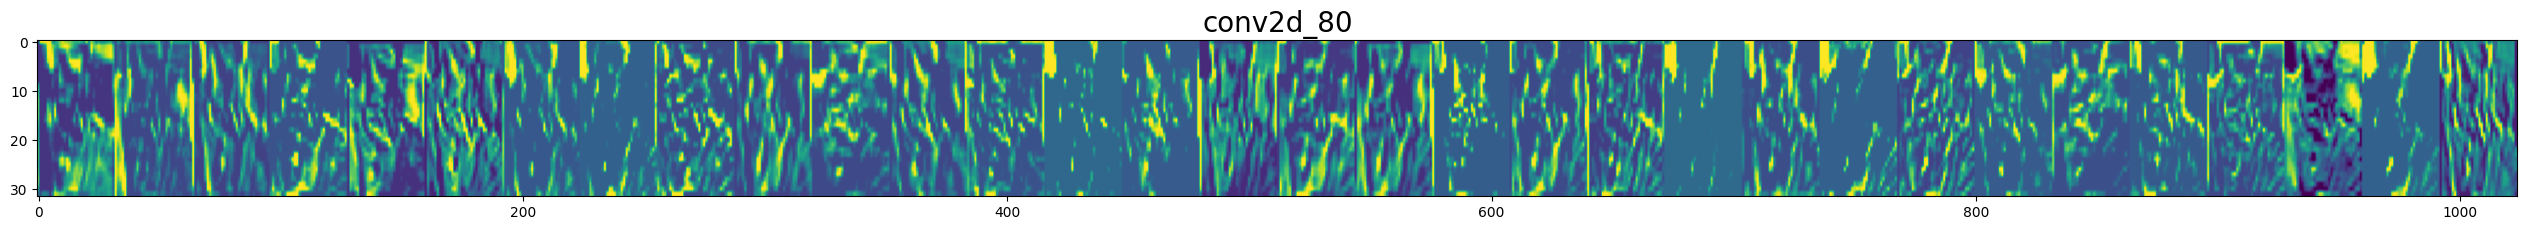

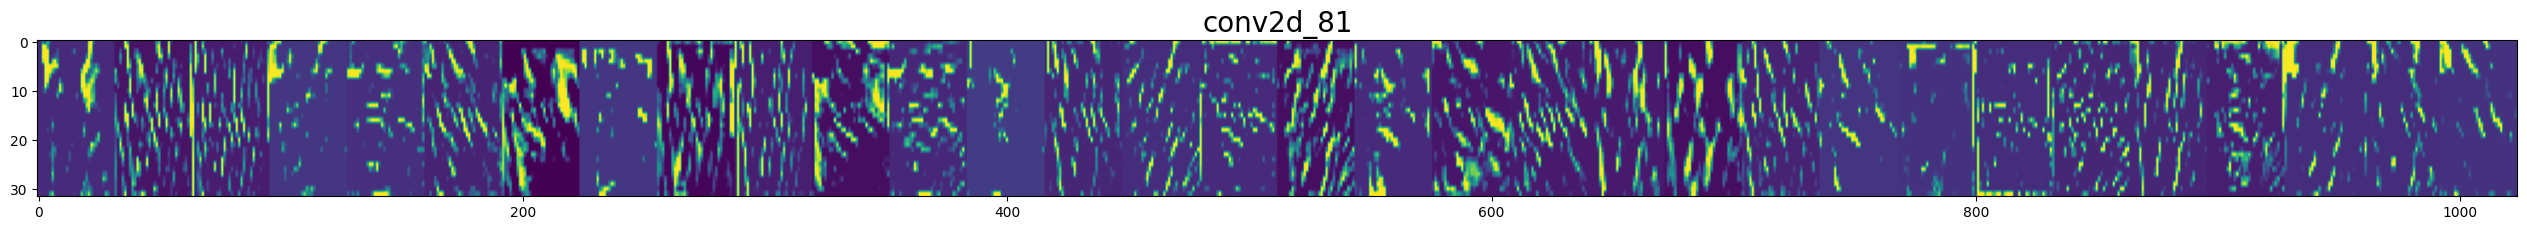

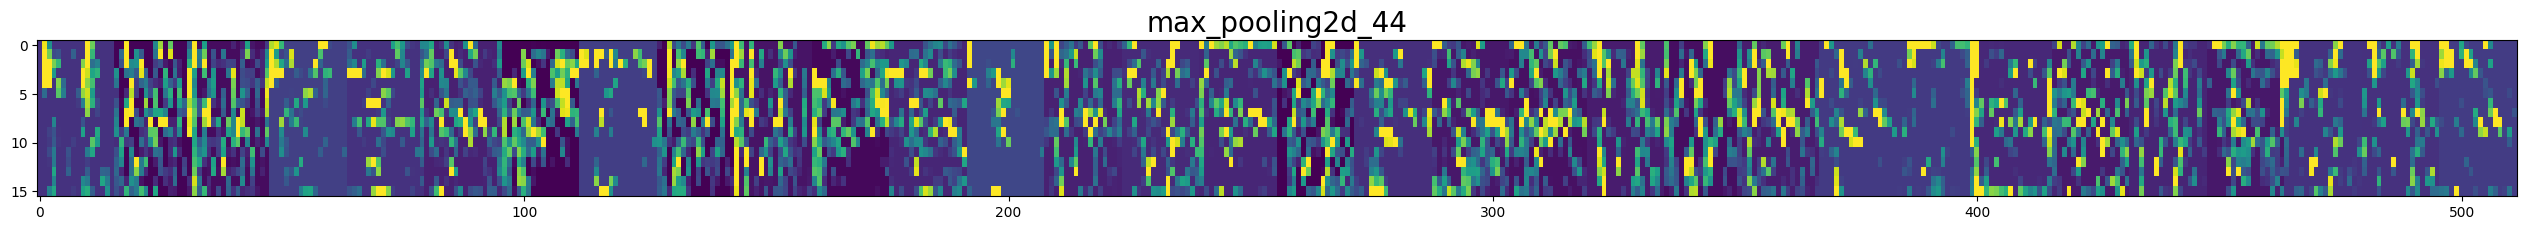

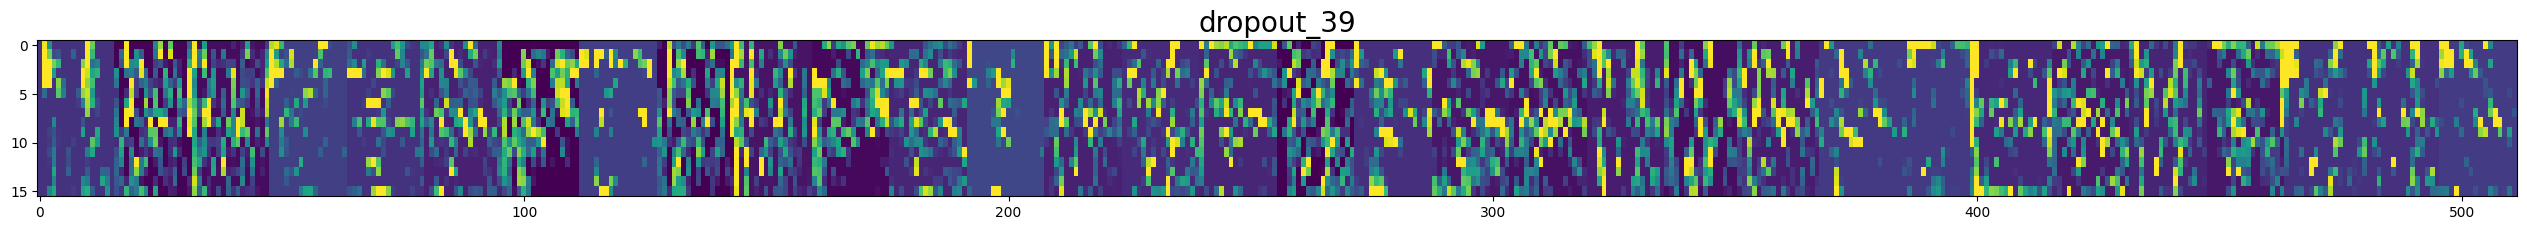

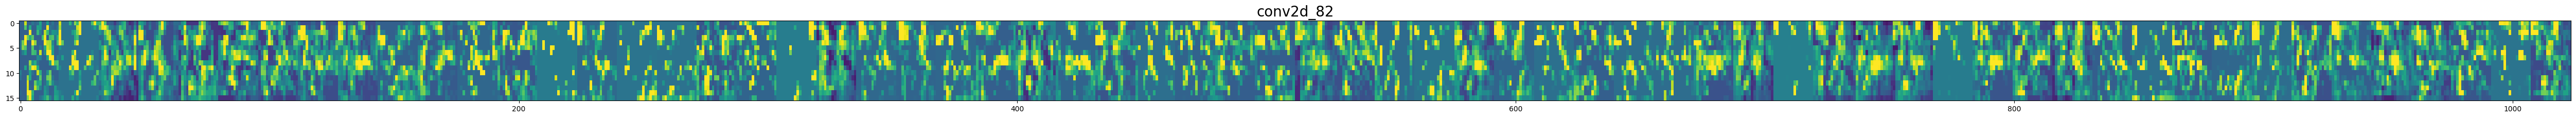

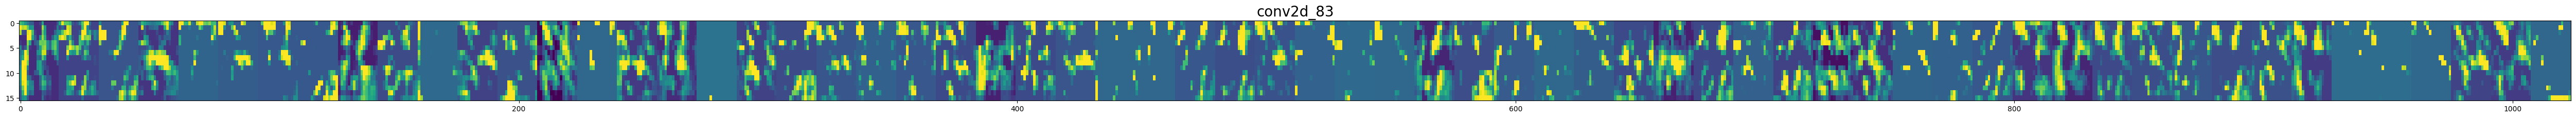

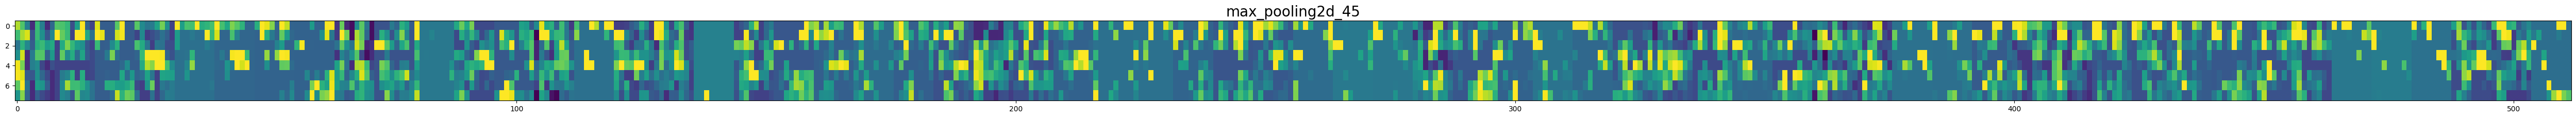

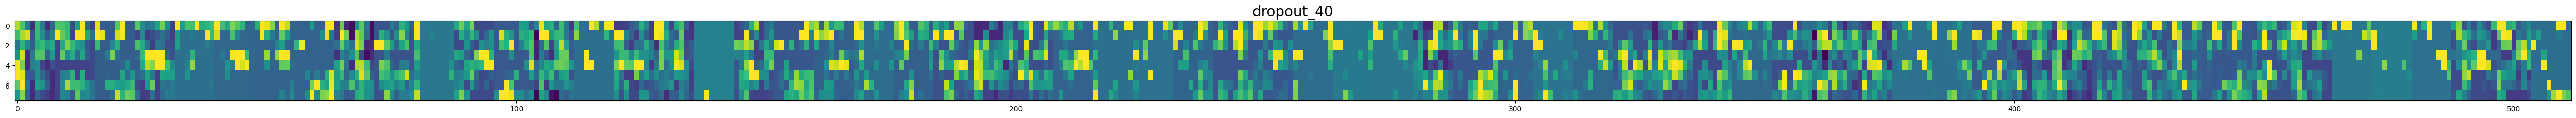

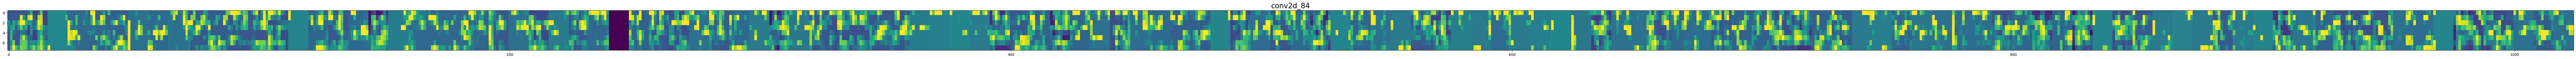

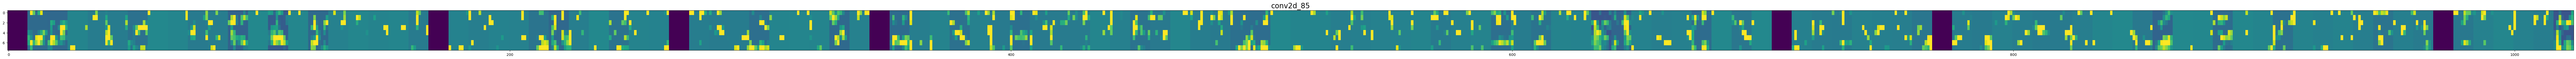

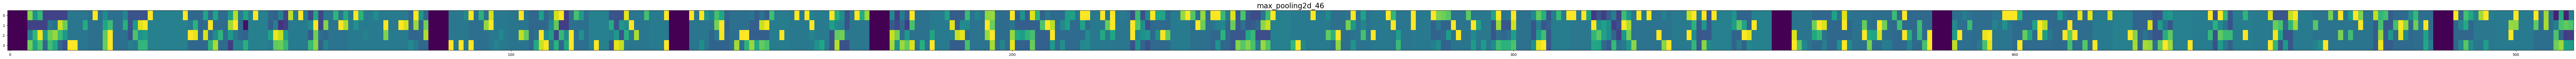

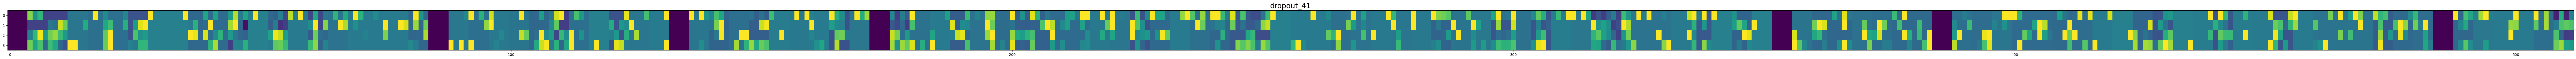

In [ ]:
import tensorflow as tf
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)
# 테스트셋의 두 번째 데이터는 '배'입니다.
test_img = np.expand_dims(x_test[8], axis = 0)
feature_maps = visual_model.predict(test_img)
for layer_name, feature_map in zip(get_layer_name, feature_maps):
  # Dense 층은 제외합니다.
  if(len(feature_map.shape) == 4):
      img_size = feature_map.shape[1]
      features = feature_map.shape[-1]

      # (img_size, img_size)의 feature_map이 features 개수만큼 존재합니다.
      display_grid = np.zeros((img_size, img_size * features))

      # 각 특징맵을 display_grid 배열에 이어붙입니다.
      for i in range(features):
        x = feature_map[0, :, :, i]
        x -= x.mean(); x /= x.std()
        x *= 64; x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * img_size : (i + 1) * img_size] = x

      plt.figure(figsize = (features, 2 + 1./features))
      plt.title(layer_name, fontsize = 20)
      plt.grid(False)
      plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')


데이터 증식 사용 예제 1) 이미지 제너레이터 사용해서 데이터 증식하기

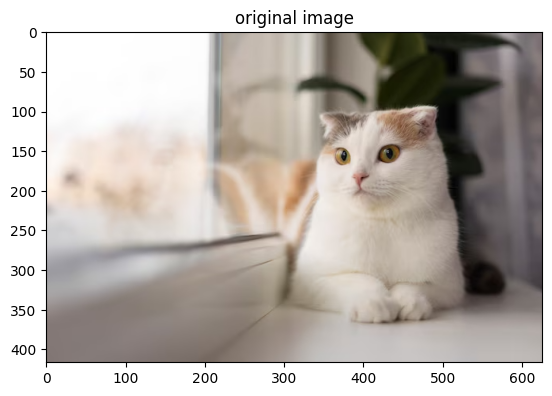

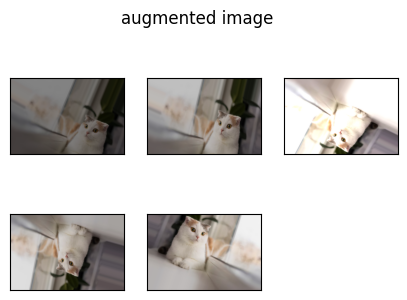

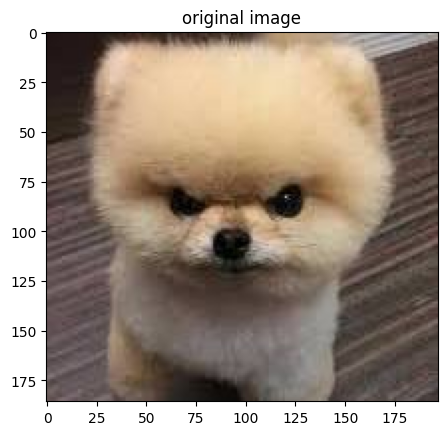

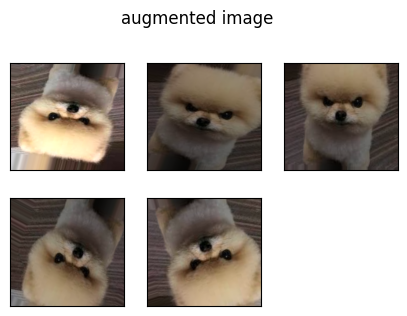

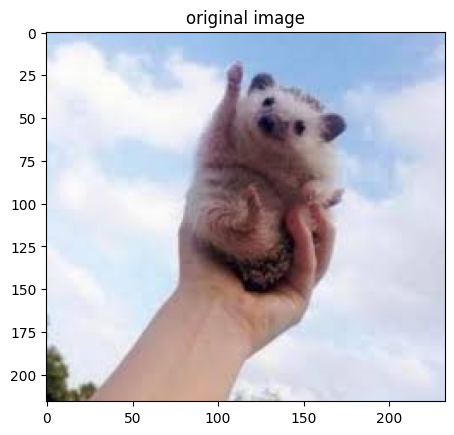

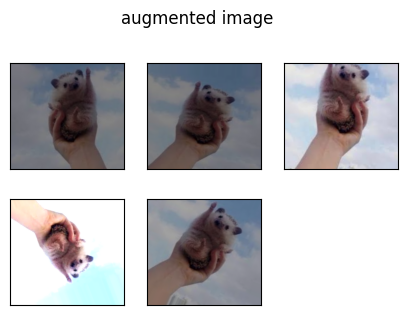

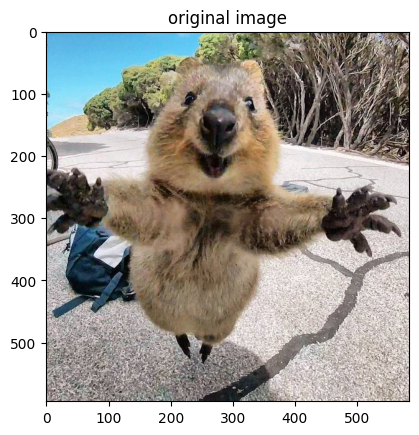

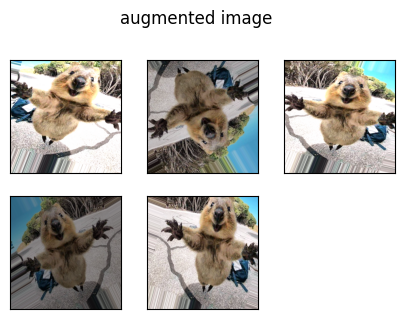

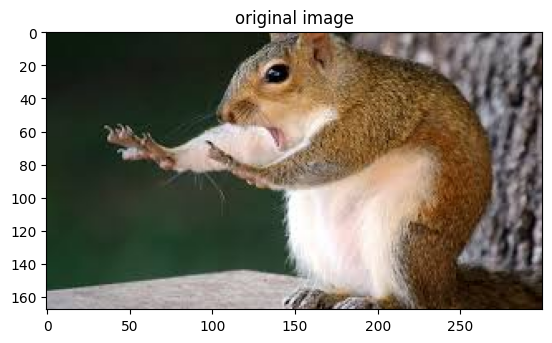

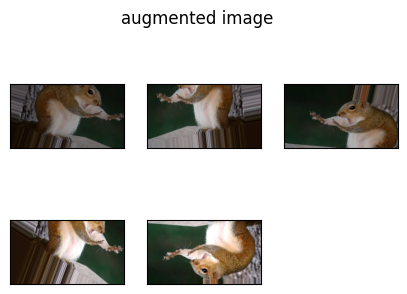

In [ ]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                    vertical_flip = True,
                                    shear_range = 0.5,
                                    brightness_range = [0.5, 1.5],
                                    zoom_range = 0.2,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    rotation_range = 30,
                                    fill_mode = 'nearest'
                                    )

file = []
file.append('cat.png')
file.append('dog.jpg')
file.append('ddabong_dochi.jpg')
file.append('quokka.jpg')
file.append('squirrel.jpg')

for j in range(5):
  img = img_to_array(load_img(file[j])).astype(np.uint8)
  plt.figure(); plt.title('original image')
  plt.imshow(img)
  # 제네레이터를 사용해서 이미지를 변환합니다.
  img = img.reshape((1, ) + img.shape)
  train_generator = train_datagen.flow(img, batch_size = 1)
  fig = plt.figure(figsize = (5, 5))
  fig.suptitle('augmented image')
  for i in range(5):
    data = next(train_generator) # 제네레이터에게서 이미지를 받아옵니다
    image = data[0]
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')

plt.show()

데이터 증식 사용 예제 2) 이미지 증식 후 모델 학습

In [ ]:
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from keras.optimizers import Adam

## 데이터 가져오기 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state = 777)

# sparse_categorical_crossentropy를 사용하기 위해선 (batch_size, ) 형태를 가져야합니다.
# 따라서 np.squeeze를 사용해서 마지막 차원을 없애줍니다.
# y_train의 경우 (35000, 1) -> (35000, )이 됩니다.
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

# 이미지 제너레이터
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')

# 검증 데이터셋에는 변환을 사용하지 않습니다.
val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train,
                                     batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val,
                                 batch_size = batch_size)

## 모델 정의
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

## 훈련 데이터의 길이와 배치 크기를 사용하여 학습 단계 수를 계산하는 함수
def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size

## 모델 훈련
history = model.fit(train_generator,
                    epochs = 100,
                    steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val), batch_size))


Epoch 1/100
  31/1094 [..............................] - ETA: 4:37 - loss: 2.3673 - acc: 0.0938

KeyboardInterrupt: 

전이 학습 예제) ImageNet 데이터로 사전 학습된 VGG16 모델 사용해보기

In [ ]:
from keras.applications import *
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from keras.optimizers import Adam

## VGG16 모델 정의, ImageNet 데이터를 학습한 모델 불러오기
vgg16 = VGG16(weights = "imagenet", input_shape = (32, 32, 3),
              include_top = False)
# vgg16.summary()
# 추가 모델
mobilenet = MobileNet(weights = None, input_shape = None,
                      include_top = True)
resnet50 = ResNet50(weights = None, input_shape = None, include_top = True)
xception = Xception(weights = None, input_shape = None, include_top = True)

mobilenet.summary()
# resnet50.summary()
# xception.summary()

# 끝의 4개의 층만 동결 해
for layer in vgg16.layers[:-4]:
 layer.trainable = False

##### train_genreator, valgenerator 오류 뜨면 #####
##### from keras.preprocessing.image import ImageDataGenerator 하고 #####
##### 주석 풀고 넣기 #####
# train_generator = train_datagen.flow(x_train, y_train,
#                                    batch_size = batch_size)
# val_generator = val_datagen.flow(x_val, y_val,
#                                batch_size = batch_size)

## 모델 추가
model = Sequential()
# model.add(vgg16)
model.add(mobilenet)
# model.add(resnet50)
# model.add(xception)

# 분류기는 직접 정의
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = Adam(1e-4),
              loss = "sparse_categorical_crossentropy",
              metrics = ["acc"])

def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size

history = model.fit(train_generator,
                    epochs = 100,
                    steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val), batch_size))

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

KeyboardInterrupt: 

[Kaggle] 예제) 개 고양이 구분 AI 만들기

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)         

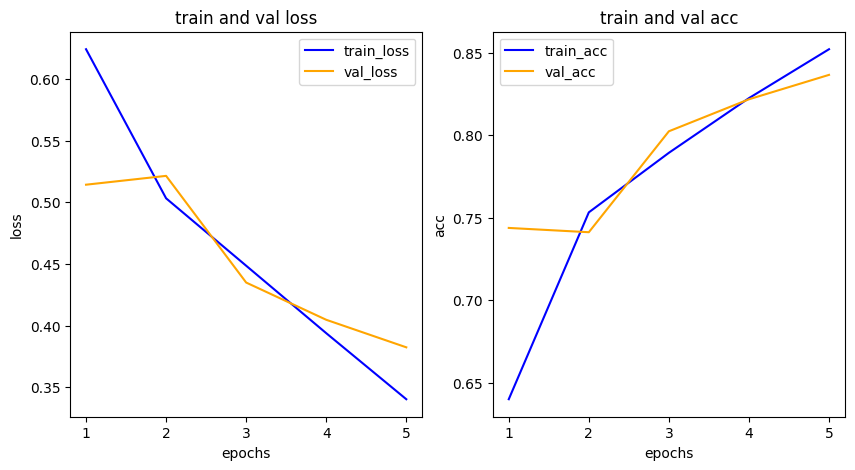

In [ ]:
import os
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
# kaggle.json 파일 권한 변경
!chmod 600 /content/kaggle.json

# Kaggle 대회 데이터 다운로드
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

# 다운로드된 파일 압축 해제
!unzip -q dogs-vs-cats-redux-kernels-edition.zip -d .
!unzip -q train.zip -d .

# 폴더 만들고 cat, dog file 이름에 따라 /content/dataset/으로 복사
os.mkdir('/content/dataset')
os.mkdir('/content/dataset/cat')
os.mkdir('/content/dataset/dog')
for i in os.listdir("/content/train/"):
  if "cat" in i:
    shutil.copyfile("/content/train/" + i, "/content/dataset/cat/" + i)
  if "dog" in i:
    shutil.copyfile("/content/train/" + i, "/content/dataset/dog/" + i)

print(len(os.listdir("/content/dataset/cat/"))) # 12,500
print(len(os.listdir("/content/dataset/dog/"))) # 12,500

# # 데이터 준비하기
# 80% 20,000
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/",
    image_size = (150, 150),
    batch_size = 64,
    subset = "training",
    validation_split = 0.2,
    seed = 1234
)
# 20% 5,000
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 "/content/dataset/",
 image_size=(150,150),
 batch_size=64,
 subset='validation',
 validation_split=0.2,
 seed=1234
)
print(train_ds)

# # 전처리 과정
def preprocessing(x, y):
  x = tf.cast( x/255.0, tf.float32 )
  return x, y
train_ds = train_ds.map(preprocessing)
val_ds = val_ds.map(preprocessing)

# # 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding="same", activation='relu',
                           input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Conv2D(64,(3,3), padding="same", activation='relu' ),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,(3,3), padding="same", activation='relu' ),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()

model.compile( loss="binary_crossentropy", optimizer="adam", metrics=['acc'])
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

이미지 증강 후, Kaggle로 가져온 개 고양이 구분

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 150, 150, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 150, 150, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 150, 150, 3)       0         
                                                                 
 conv2d_100 (Conv2D)         (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_101 (Conv2D)         (None, 75, 75, 64)       

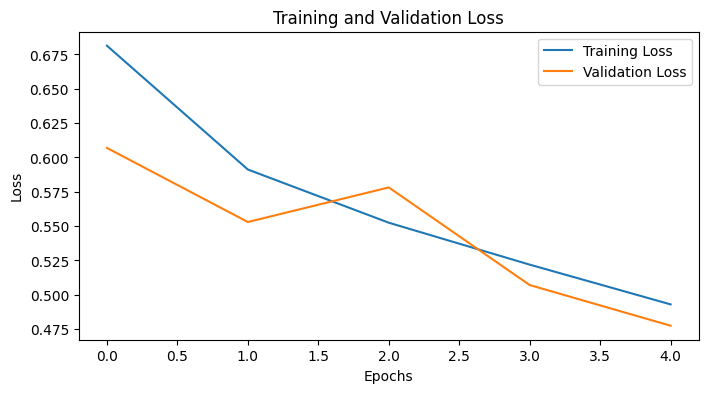

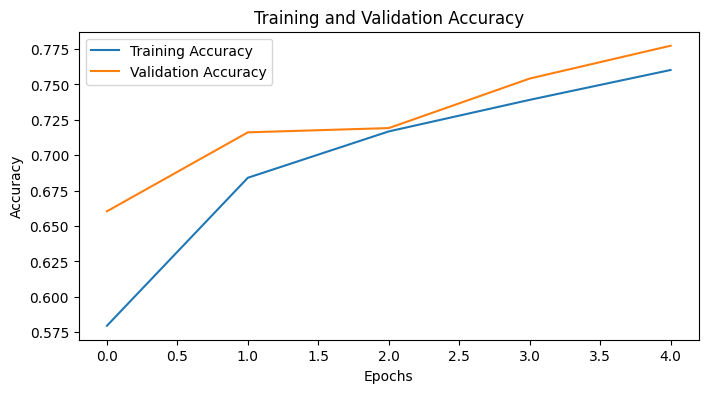

In [ ]:
import os
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
from keras.utils import plot_model


# # 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal',
                                                          input_shape=(150,150,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.Conv2D(32,(3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Conv2D(64,(3,3), padding="same", activation='relu' ),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,(3,3), padding="same", activation='relu' ),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
model.compile( loss="binary_crossentropy", optimizer="adam", metrics=['acc'])
history = model.fit(train_ds, validation_data=val_ds, epochs=5)


# 손실값(Loss) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도(Accuracy) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

이미지 전이학습 후, 개 고양이 구분

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_103 (Conv2D)         (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_103[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

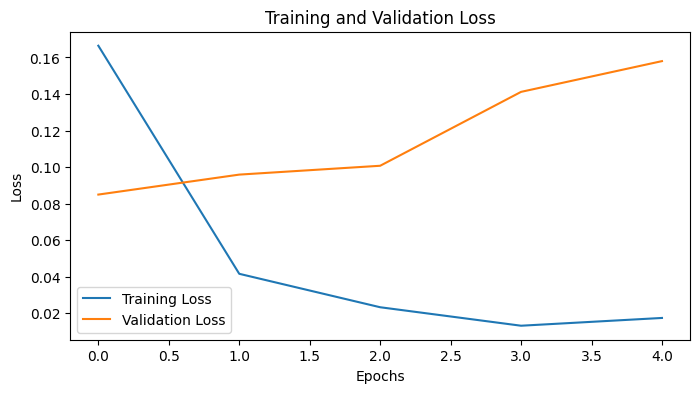

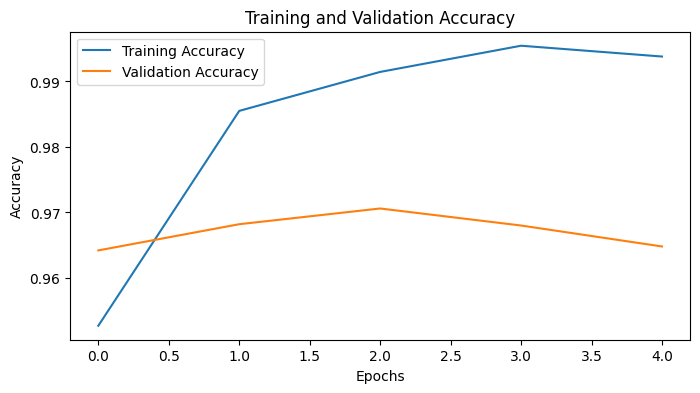

In [ ]:
import tensorflow as tf
import requests
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf

# # Inception_v3.h5 파일 다운받기 (weight파일)
url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
r = requests.get(url, allow_redirects=True)
open('inception_v3.h5', 'wb').write(r.content)

# # 구글의 InceptionV3 모델 불러오기
inception_model = InceptionV3( input_shape=(150,150,3), include_top=False, weights=None) # 원래 (299,299,3)

# # Weight 파일 + inception_model 합치기
inception_model.load_weights('inception_v3.h5')
inception_model.summary() # 마지막레이어가 없는, Conv+Pooling으로 이미지 분석 레이어

# # 학습금지레이어 설정
for i in inception_model.layers:
 i.trainable = False # 이 레이어는 학습 금지

# # 원하는 레이어만 가져오기
mixed7_layer = inception_model.get_layer('mixed7')

print(mixed7_layer)
print(mixed7_layer.output)
print(mixed7_layer.output_shape)

# # 연결하기
layer1 = tf.keras.layers.Flatten()(mixed7_layer.output)
layer2 = tf.keras.layers.Dense(1024, activation='relu')(layer1)
drop1 = tf.keras.layers.Dropout(0.2)(layer2)
layer3 = tf.keras.layers.Dense(1, activation='sigmoid')(drop1)
model = tf.keras.Model(inception_model.input, layer3)

# # 모델 학습
model = tf.keras.Model(inception_model.input, layer3)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(train_ds, validation_data=val_ds, epochs=5)

[Kaggle] working time - 실습) Face expression recognitiojn dataset 활용해서 증강 및 전이학습 해보기

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 96, 96, 3)         0         
                                                                 
 random_rotation_2 (RandomR  (None, 96, 96, 3)         0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 96, 96, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_6

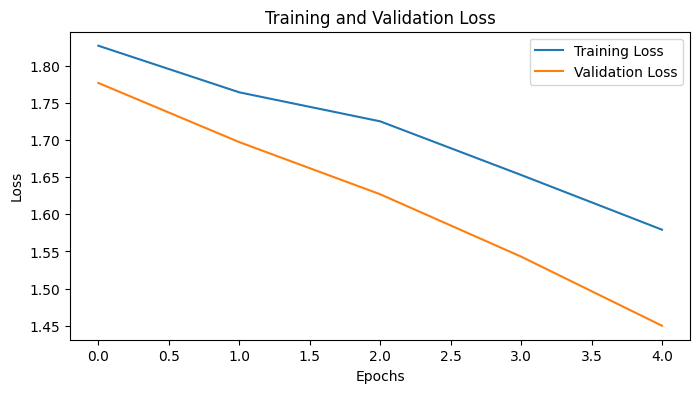

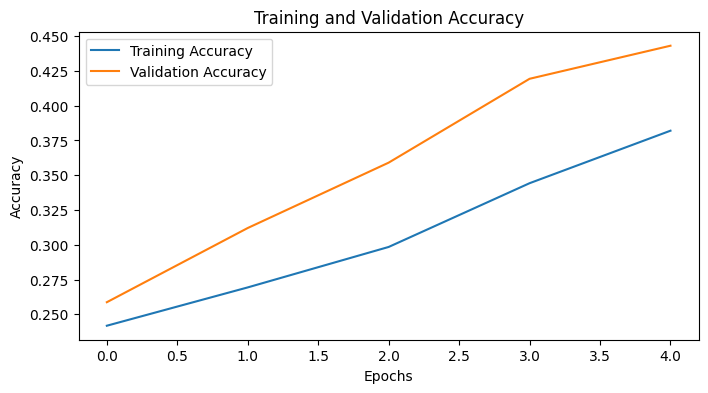

Epoch 1/15
451/451 [==============================] - 22s 38ms/step - loss: 1.5850 - acc: 0.4487 - val_loss: 1.2774 - val_acc: 0.5187
Epoch 2/15
451/451 [==============================] - 14s 31ms/step - loss: 1.2710 - acc: 0.5186 - val_loss: 1.2259 - val_acc: 0.5423
Epoch 3/15
451/451 [==============================] - 15s 33ms/step - loss: 1.1930 - acc: 0.5477 - val_loss: 1.2279 - val_acc: 0.5425
Epoch 4/15
451/451 [==============================] - 17s 37ms/step - loss: 1.1347 - acc: 0.5734 - val_loss: 1.2315 - val_acc: 0.5559
Epoch 5/15
451/451 [==============================] - 14s 32ms/step - loss: 1.0704 - acc: 0.5998 - val_loss: 1.2022 - val_acc: 0.5579
Epoch 6/15
451/451 [==============================] - 17s 37ms/step - loss: 0.9996 - acc: 0.6295 - val_loss: 1.2094 - val_acc: 0.5648
Epoch 7/15
451/451 [==============================] - 14s 31ms/step - loss: 0.9473 - acc: 0.6441 - val_loss: 1.2485 - val_acc: 0.5698
Epoch 8/15
451/451 [==============================] - 14s 32ms

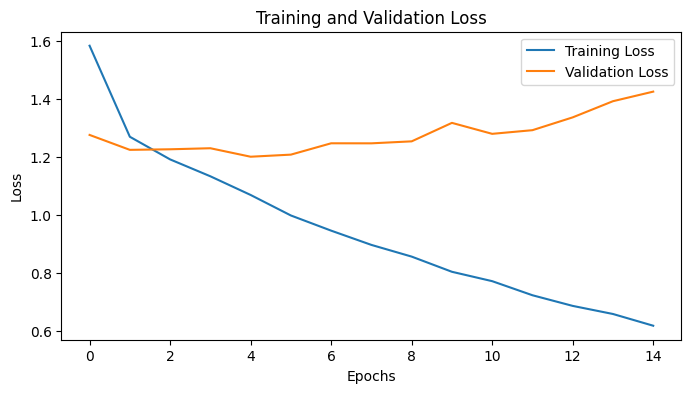

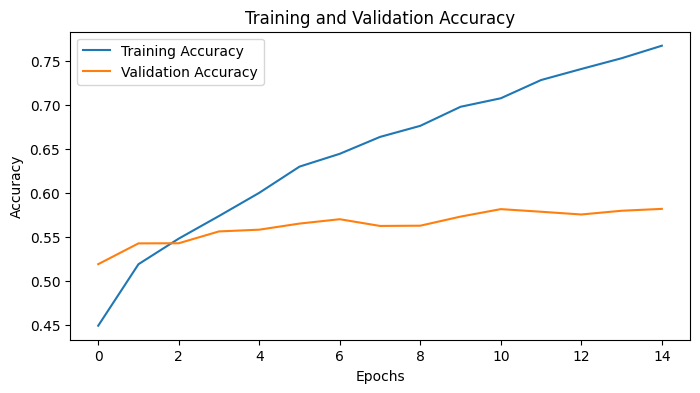

In [ ]:
import os
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
from keras.utils import plot_model
import requests
from keras.applications.inception_v3 import InceptionV3

# # # # # # # # # # # 데이터 가져오기 # # # # # # # # # # #
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
# !chmod 600 /content/kaggle.json
# !kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset
# !unzip -q face-expression-recognition-dataset.zip -d .

# # # # # # # # # # # 데이터 준비하기 # # # # # # # # # # #
# 80% 20,000
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/images/train/",
    image_size = (96, 96),
    batch_size = 64,
    seed = 1234,
    label_mode='int'
)
# 20% 5,000
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/images/validation/",
    image_size=(96,96),
    batch_size=64,
    seed=1234,
    label_mode='int'
)
print(train_ds)

# # 전처리 과정
def preprocessing(x, y):
    # x = tf.image.rgb_to_grayscale(x)  # 컬러 이미지를 흑백 이미지로 변환
    x = tf.cast(x, tf.float32) / 255.0  # 데이터를 0과 1 사이의 값으로 정규화
    return x, y

# 데이터셋에 전처리 함수 적용
train_ds = train_ds.map(preprocessing)
val_ds = val_ds.map(preprocessing)

# # # # # # # # # # # 이미지 증강 후 모델 구성 # # # # # # # # # # #
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal',
                                                          input_shape=(96,96,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.Conv2D(32,(3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Conv2D(64,(3,3), padding="same", activation='relu' ),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128,(3,3), padding="same", activation='relu' ),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(7, activation="softmax"),
])
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
model.compile( loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['acc'])
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

# # # # # # # # # # # 이미지 증강 후 모델 유효도 보기 # # # # # # # # # # #
# 손실값(Loss) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도(Accuracy) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# # # # # # # # # # # 이미지 전이 학습 모델 구성 # # # # # # # # # # #
# # Inception_v3.h5 파일 다운받기 (weight파일)
url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
r = requests.get(url, allow_redirects=True)
open('inception_v3.h5', 'wb').write(r.content)

# # 구글의 InceptionV3 모델 불러오기
inception_model = InceptionV3( input_shape=(96,96,3), include_top=False, weights=None) # 원래 (299,299,3)

# # Weight 파일 + inception_model 합치기
inception_model.load_weights('inception_v3.h5')
# inception_model.summary() # 마지막레이어가 없는, Conv+Pooling으로 이미지 분석 레이어

# # 학습금지레이어 설정
for i in inception_model.layers:
 i.trainable = False # 이 레이어는 학습 금지

# # 원하는 레이어만 가져오기
mixed7_layer = inception_model.get_layer('mixed7')

# print(mixed7_layer)
# print(mixed7_layer.output)
# print(mixed7_layer.output_shape)

# # 연결하기
layer1 = tf.keras.layers.Flatten()(mixed7_layer.output)
layer2 = tf.keras.layers.Dense(1024, activation='relu')(layer1)
drop1 = tf.keras.layers.Dropout(0.4)(layer2)
layer3 = tf.keras.layers.Dense(7, activation='softmax')(drop1)
model = tf.keras.Model(inception_model.input, layer3)

# # 모델 학습
model = tf.keras.Model(inception_model.input, layer3)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_ds, validation_data=val_ds, epochs=15)

# # # # # # # # # # # 이미지 전이 학습 모델 유효도 보기 # # # # # # # # # # #
# 손실값(Loss) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도(Accuracy) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()